In [1]:
from pyomo.environ import (Constraint,
                           Var,
                           ConcreteModel,
                           Expression,
                           Param,
                           Objective,
                           SolverFactory,
                           TransformationFactory,
                           value)

from pyomo.network import Arc, SequentialDecomposition

from idaes.core.util.initialization import propagate_state

# Import plotting functions
import matplotlib.pyplot as plt

# Import numpy library 
import numpy as np

# Import the main FlowsheetBlock from IDAES. The flowsheet block will contain the unit model
from idaes.core import FlowsheetBlock

import idaes.logger as idaeslog
from pyomo.opt import TerminationCondition, SolverStatus

# Import the degrees_of_freedom function from the idaes.core.util.model_statistics package
# DOF = Number of Model Variables - Number of Model Constraints
from idaes.core.util.model_statistics import degrees_of_freedom

# Import the Generic Parameter Block
from idaes.generic_models.properties.core.generic.generic_property import (
        GenericParameterBlock)

# Import unit models from the model library
from idaes.generic_models.unit_models import Flash

# Import R32, R125, IL info file
from HFCs_bmimPF6_PR import configuration

    'pyomo.common.formatting.tabular_writer'.  Please update your import.
    (deprecated in 6.1) (called from <frozen importlib._bootstrap>:228)
    'pyomo.core.base.disable_methods.disable_methods'.  Please update your
    import.  (deprecated in 6.1) (called from <frozen
    importlib._bootstrap>:228)


In [2]:
m1 = ConcreteModel()
m1.fs = FlowsheetBlock(default={"dynamic": False})
m1.fs.properties = GenericParameterBlock(default=configuration)
m1.fs.F101 = Flash(default={"property_package": m1.fs.properties,
                           "has_heat_transfer": True,
                           "has_pressure_change": True})

m2 = ConcreteModel()
m2.fs = FlowsheetBlock(default={"dynamic": False})
m2.fs.properties = GenericParameterBlock(default=configuration)
m2.fs.F101 = Flash(default={"property_package": m2.fs.properties,
                           "has_heat_transfer": True,
                           "has_pressure_change": True})

m3 = ConcreteModel()
m3.fs = FlowsheetBlock(default={"dynamic": False})
m3.fs.properties = GenericParameterBlock(default=configuration)
m3.fs.F101 = Flash(default={"property_package": m3.fs.properties,
                           "has_heat_transfer": True,
                           "has_pressure_change": True})

m4 = ConcreteModel()
m4.fs = FlowsheetBlock(default={"dynamic": False})
m4.fs.properties = GenericParameterBlock(default=configuration)
m4.fs.F101 = Flash(default={"property_package": m4.fs.properties,
                           "has_heat_transfer": True,
                           "has_pressure_change": True})

m5 = ConcreteModel()
m5.fs = FlowsheetBlock(default={"dynamic": False})
m5.fs.properties = GenericParameterBlock(default=configuration)
m5.fs.F101 = Flash(default={"property_package": m5.fs.properties,
                           "has_heat_transfer": True,
                           "has_pressure_change": True})

    (ordered) position is deprecated.  Please use at()  (deprecated in 6.1,
    will be removed in (or after) 7.0) (called from
    c:\software\my_fork\kappa\idaes-pse-
    main\idaes\generic_models\properties\core\state_definitions\FTPx.py:175)
    (ordered) position is deprecated.  Please use at()  (deprecated in 6.1,
    will be removed in (or after) 7.0) (called from
    c:\software\my_fork\kappa\idaes-pse-
    main\idaes\generic_models\properties\core\state_definitions\FTPx.py:173)
    (ordered) position is deprecated.  Please use at()  (deprecated in 6.1,
    will be removed in (or after) 7.0) (called from
    c:\software\my_fork\kappa\idaes-pse-
    main\idaes\generic_models\properties\core\state_definitions\FTPx.py:178)
    (ordered) position is deprecated.  Please use at()  (deprecated in 6.1,
    will be removed in (or after) 7.0) (called from
    c:\software\my_fork\kappa\idaes-pse-
    main\idaes\generic_models\properties\core\state_definitions\FTPx.py:176)


In [3]:
# Constant M1
m1.fs.properties.PR_kappa_A['R32', 'R125'].fix(0.009)
m1.fs.properties.PR_kappa_A['R125', 'R32'].fix(0.007)
m1.fs.properties.PR_kappa_A['R32', 'bmimPF6'].fix(-0.02608)
m1.fs.properties.PR_kappa_A['bmimPF6', 'R32'].fix(-0.0704)
m1.fs.properties.PR_kappa_A['bmimPF6', 'R125'].fix(0.345)
m1.fs.properties.PR_kappa_A['R125', 'bmimPF6'].fix(0.058856)

# Linear M2
m2.fs.properties.PR_kappa_A['R32', 'R125'].fix(0.39255)
m2.fs.properties.PR_kappa_A['R125', 'R32'].fix(-0.375437)
m2.fs.properties.PR_kappa_A['R32', 'bmimPF6'].fix(0.02700)
m2.fs.properties.PR_kappa_A['bmimPF6', 'R32'].fix(0.26803)
m2.fs.properties.PR_kappa_A['bmimPF6', 'R125'].fix(-1.601578)
m2.fs.properties.PR_kappa_A['R125', 'bmimPF6'].fix(-0.111417)
m2.fs.properties.PR_kappa_B['R32', 'R125'].fix(-0.389117)
m2.fs.properties.PR_kappa_B['R125', 'R32'].fix(0.3892)
m2.fs.properties.PR_kappa_B['R32', 'bmimPF6'].fix(-0.04879)
m2.fs.properties.PR_kappa_B['bmimPF6', 'R32'].fix(-0.3153)
m2.fs.properties.PR_kappa_B['bmimPF6', 'R125'].fix(2.086037)
m2.fs.properties.PR_kappa_B['R125', 'bmimPF6'].fix(0.170299)

# Ternary M3
m3.fs.properties.PR_kappa_A['R32', 'R125'].fix(0.009)
m3.fs.properties.PR_kappa_A['R125', 'R32'].fix(0.007)
m3.fs.properties.PR_kappa_A['R32', 'bmimPF6'].fix(-0.043507)
m3.fs.properties.PR_kappa_A['bmimPF6', 'R32'].fix(-0.35057)
m3.fs.properties.PR_kappa_A['bmimPF6', 'R125'].fix(1.677866)
m3.fs.properties.PR_kappa_A['R125', 'bmimPF6'].fix(0.060435)

# Ternary M4
m4.fs.properties.PR_kappa_A['R32', 'R125'].fix(0.009)
m4.fs.properties.PR_kappa_A['R125', 'R32'].fix(0.007)
m4.fs.properties.PR_kappa_A['R32', 'bmimPF6'].fix(-0.0328315)
m4.fs.properties.PR_kappa_A['bmimPF6', 'R32'].fix(-0.1130500)
m4.fs.properties.PR_kappa_A['bmimPF6', 'R125'].fix(0.413767)
m4.fs.properties.PR_kappa_A['R125', 'bmimPF6'].fix(0.059460)

# Ternary M5
m5.fs.properties.PR_kappa_A['R32', 'R125'].fix(0.39255)
m5.fs.properties.PR_kappa_A['R125', 'R32'].fix(-0.375437)
m5.fs.properties.PR_kappa_B['R32', 'R125'].fix(-0.389117)
m5.fs.properties.PR_kappa_B['R125', 'R32'].fix(0.3892)

m5.fs.properties.PR_kappa_A['bmimPF6', 'R125'].fix(-1.764584)
m5.fs.properties.PR_kappa_A['R125', 'bmimPF6'].fix(-0.161157)
m5.fs.properties.PR_kappa_A['bmimPF6', 'R32'].fix(-0.010645)
m5.fs.properties.PR_kappa_A['R32', 'bmimPF6'].fix(-0.024842)

m5.fs.properties.PR_kappa_B['bmimPF6', 'R125'].fix(2.123490)
m5.fs.properties.PR_kappa_B['R125', 'bmimPF6'].fix(0.21234)
m5.fs.properties.PR_kappa_B['bmimPF6', 'R32'].fix(-0.09102)
m5.fs.properties.PR_kappa_B['R32', 'bmimPF6'].fix(-0.00556)

In [4]:
solver = SolverFactory('ipopt')
solver.options = {'tol': 1e-6}

In [5]:
# Set pressures to loop over
T = [284,288,293,298,303,308,313,318,323]

# Set fraction of feed compositions of HFCs to loop over
P = [100000]

# Make outlet arrays
IL_x = np.zeros((len(T),len(P)))
IL_y = np.zeros((len(T),len(P)))
R32_x = np.zeros((len(T),len(P)))
R32_y = np.zeros((len(T),len(P)))
R125_x = np.zeros((len(T),len(P)))
R125_y = np.zeros((len(T),len(P))) 
L = np.zeros((len(T),len(P)))
V = np.zeros((len(T),len(P))) 

IL_x2 = np.zeros((len(T),len(P)))
IL_y2 = np.zeros((len(T),len(P)))
R32_x2 = np.zeros((len(T),len(P)))
R32_y2 = np.zeros((len(T),len(P)))
R125_x2 = np.zeros((len(T),len(P)))
R125_y2 = np.zeros((len(T),len(P))) 
L2 = np.zeros((len(T),len(P)))
V2 = np.zeros((len(T),len(P))) 

IL_x3 = np.zeros((len(T),len(P)))
IL_y3 = np.zeros((len(T),len(P)))
R32_x3 = np.zeros((len(T),len(P)))
R32_y3 = np.zeros((len(T),len(P)))
R125_x3 = np.zeros((len(T),len(P)))
R125_y3 = np.zeros((len(T),len(P))) 
L3 = np.zeros((len(T),len(P)))
V3 = np.zeros((len(T),len(P))) 

IL_x4 = np.zeros((len(T),len(P)))
IL_y4 = np.zeros((len(T),len(P)))
R32_x4 = np.zeros((len(T),len(P)))
R32_y4 = np.zeros((len(T),len(P)))
R125_x4 = np.zeros((len(T),len(P)))
R125_y4 = np.zeros((len(T),len(P))) 
L4 = np.zeros((len(T),len(P)))
V4 = np.zeros((len(T),len(P))) 

IL_x5 = np.zeros((len(T),len(P)))
IL_y5 = np.zeros((len(T),len(P)))
R32_x5 = np.zeros((len(T),len(P)))
R32_y5 = np.zeros((len(T),len(P)))
R125_x5 = np.zeros((len(T),len(P)))
R125_y5 = np.zeros((len(T),len(P))) 
L5 = np.zeros((len(T),len(P)))
V5 = np.zeros((len(T),len(P))) 

m1.fs.F101.inlet.flow_mol.fix(10)
m1.fs.F101.inlet.temperature.fix(371)
m1.fs.F101.inlet.mole_frac_comp[0, "R32"].fix(0.216)
m1.fs.F101.inlet.mole_frac_comp[0, "R125"].fix(0.003)
m1.fs.F101.inlet.mole_frac_comp[0, "bmimPF6"].fix(0.781) 
m1.fs.F101.inlet.pressure.fix(1000000)

m2.fs.F101.inlet.flow_mol.fix(10)
m2.fs.F101.inlet.temperature.fix(371)
m2.fs.F101.inlet.mole_frac_comp[0, "R32"].fix(0.216)
m2.fs.F101.inlet.mole_frac_comp[0, "R125"].fix(0.003)
m2.fs.F101.inlet.mole_frac_comp[0, "bmimPF6"].fix(0.781) 
m2.fs.F101.inlet.pressure.fix(1000000)

m3.fs.F101.inlet.flow_mol.fix(10)
m3.fs.F101.inlet.temperature.fix(371)
m3.fs.F101.inlet.mole_frac_comp[0, "R32"].fix(0.216)
m3.fs.F101.inlet.mole_frac_comp[0, "R125"].fix(0.003)
m3.fs.F101.inlet.mole_frac_comp[0, "bmimPF6"].fix(0.781) 
m3.fs.F101.inlet.pressure.fix(1000000)

m4.fs.F101.inlet.flow_mol.fix(10)
m4.fs.F101.inlet.temperature.fix(371)
m4.fs.F101.inlet.mole_frac_comp[0, "R32"].fix(0.216)
m4.fs.F101.inlet.mole_frac_comp[0, "R125"].fix(0.003)
m4.fs.F101.inlet.mole_frac_comp[0, "bmimPF6"].fix(0.781) 
m4.fs.F101.inlet.pressure.fix(1000000)

m5.fs.F101.inlet.flow_mol.fix(10)
m5.fs.F101.inlet.temperature.fix(371)
m5.fs.F101.inlet.mole_frac_comp[0, "R32"].fix(0.216)
m5.fs.F101.inlet.mole_frac_comp[0, "R125"].fix(0.003)
m5.fs.F101.inlet.mole_frac_comp[0, "bmimPF6"].fix(0.781) 
m5.fs.F101.inlet.pressure.fix(1000000)

m1.fs.F101.initialize(outlvl=idaeslog.DEBUG) 

for i in range(len(T)):
    m1.fs.F101.vap_outlet.temperature.fix(T[i])

    m2.fs.F101.vap_outlet.temperature.fix(T[i])
    
    m3.fs.F101.vap_outlet.temperature.fix(T[i])
    
    m4.fs.F101.vap_outlet.temperature.fix(T[i])
    
    m5.fs.F101.vap_outlet.temperature.fix(T[i])
        
    for j in range(len(P)):
        
        m1.fs.F101.inlet.pressure.fix(P[j])
        m1.fs.F101.vap_outlet.pressure.fix(P[j])
        
        m2.fs.F101.inlet.pressure.fix(P[j])
        m2.fs.F101.vap_outlet.pressure.fix(P[j])
        
        m3.fs.F101.inlet.pressure.fix(P[j])
        m3.fs.F101.vap_outlet.pressure.fix(P[j])
        
        m4.fs.F101.inlet.pressure.fix(P[j])
        m4.fs.F101.vap_outlet.pressure.fix(P[j])
        
        m5.fs.F101.inlet.pressure.fix(P[j])
        m5.fs.F101.vap_outlet.pressure.fix(P[j])
        
        m1.fs.F101.initialize(outlvl=idaeslog.CRITICAL)              
        m2.fs.F101.initialize(outlvl=idaeslog.CRITICAL)
        m3.fs.F101.initialize(outlvl=idaeslog.CRITICAL)
        m4.fs.F101.initialize(outlvl=idaeslog.CRITICAL)
        m5.fs.F101.initialize(outlvl=idaeslog.CRITICAL)
        
        # solve the model
        status1 = solver.solve(m1, tee = False)
        status2 = solver.solve(m2, tee = False)
        status3 = solver.solve(m3, tee = False)
        status4 = solver.solve(m3, tee = False)
        status5 = solver.solve(m3, tee = False)
        
        # If solution is optimal store the concentration, and calculated temperatures in the created arrays
        if (status1.solver.status == SolverStatus.ok) and (status1.solver.termination_condition == TerminationCondition.optimal):

            IL_x[i,j] = value(m1.fs.F101.liq_outlet.mole_frac_comp[0, "bmimPF6"])
            IL_y[i,j] = value(m1.fs.F101.vap_outlet.mole_frac_comp[0, "bmimPF6"])
            R32_x[i,j] = value(m1.fs.F101.liq_outlet.mole_frac_comp[0, "R32"]) 
            R32_y[i,j] = value(m1.fs.F101.vap_outlet.mole_frac_comp[0, "R32"])
            R125_x[i,j] = value(m1.fs.F101.liq_outlet.mole_frac_comp[0, "R125"])
            R125_y[i,j] = value(m1.fs.F101.vap_outlet.mole_frac_comp[0, "R125"])
            L[i,j] = value(m1.fs.F101.liq_outlet.flow_mol[0])
            V[i,j] = value(m1.fs.F101.vap_outlet.flow_mol[0])

        if (status2.solver.status == SolverStatus.ok) and (status2.solver.termination_condition == TerminationCondition.optimal):
            IL_x2[i,j] = value(m2.fs.F101.liq_outlet.mole_frac_comp[0, "bmimPF6"])
            IL_y2[i,j] = value(m2.fs.F101.vap_outlet.mole_frac_comp[0, "bmimPF6"])
            R32_x2[i,j] = value(m2.fs.F101.liq_outlet.mole_frac_comp[0, "R32"]) 
            R32_y2[i,j] = value(m2.fs.F101.vap_outlet.mole_frac_comp[0, "R32"])
            R125_x2[i,j] = value(m2.fs.F101.liq_outlet.mole_frac_comp[0, "R125"])
            R125_y2[i,j] = value(m2.fs.F101.vap_outlet.mole_frac_comp[0, "R125"])
            L2[i,j] = value(m2.fs.F101.liq_outlet.flow_mol[0])
            V2[i,j] = value(m2.fs.F101.vap_outlet.flow_mol[0])
           
        if (status3.solver.status == SolverStatus.ok) and (status3.solver.termination_condition == TerminationCondition.optimal):  
            
            IL_x3[i,j] = value(m3.fs.F101.liq_outlet.mole_frac_comp[0, "bmimPF6"])
            IL_y3[i,j] = value(m3.fs.F101.vap_outlet.mole_frac_comp[0, "bmimPF6"])
            R32_x3[i,j] = value(m3.fs.F101.liq_outlet.mole_frac_comp[0, "R32"]) 
            R32_y3[i,j] = value(m3.fs.F101.vap_outlet.mole_frac_comp[0, "R32"])
            R125_x3[i,j] = value(m3.fs.F101.liq_outlet.mole_frac_comp[0, "R125"])
            R125_y3[i,j] = value(m3.fs.F101.vap_outlet.mole_frac_comp[0, "R125"])
            L3[i,j] = value(m3.fs.F101.liq_outlet.flow_mol[0])
            V3[i,j] = value(m3.fs.F101.vap_outlet.flow_mol[0])

        if (status4.solver.status == SolverStatus.ok) and (status4.solver.termination_condition == TerminationCondition.optimal):  
            
            IL_x4[i,j] = value(m4.fs.F101.liq_outlet.mole_frac_comp[0, "bmimPF6"])
            IL_y4[i,j] = value(m4.fs.F101.vap_outlet.mole_frac_comp[0, "bmimPF6"])
            R32_x4[i,j] = value(m4.fs.F101.liq_outlet.mole_frac_comp[0, "R32"]) 
            R32_y4[i,j] = value(m4.fs.F101.vap_outlet.mole_frac_comp[0, "R32"])
            R125_x4[i,j] = value(m4.fs.F101.liq_outlet.mole_frac_comp[0, "R125"])
            R125_y4[i,j] = value(m4.fs.F101.vap_outlet.mole_frac_comp[0, "R125"])
            L4[i,j] = value(m4.fs.F101.liq_outlet.flow_mol[0])
            V4[i,j] = value(m4.fs.F101.vap_outlet.flow_mol[0])
  
        if (status5.solver.status == SolverStatus.ok) and (status5.solver.termination_condition == TerminationCondition.optimal):  
            
            IL_x5[i,j] = value(m5.fs.F101.liq_outlet.mole_frac_comp[0, "bmimPF6"])
            IL_y5[i,j] = value(m5.fs.F101.vap_outlet.mole_frac_comp[0, "bmimPF6"])
            R32_x5[i,j] = value(m5.fs.F101.liq_outlet.mole_frac_comp[0, "R32"]) 
            R32_y5[i,j] = value(m5.fs.F101.vap_outlet.mole_frac_comp[0, "R32"])
            R125_x5[i,j] = value(m5.fs.F101.liq_outlet.mole_frac_comp[0, "R125"])
            R125_y5[i,j] = value(m5.fs.F101.vap_outlet.mole_frac_comp[0, "R125"])
            L5[i,j] = value(m5.fs.F101.liq_outlet.flow_mol[0])
            V5[i,j] = value(m5.fs.F101.vap_outlet.flow_mol[0])
            #Change this to feasible
            print("Running temperature:",T[i],"and HFC feed fraction",P[j])

        else:
            print('Infeasible.')

2022-05-24 14:55:18 [INFO] idaes.init.fs.F101.control_volume.properties_in: Starting initialization
2022-05-24 14:55:19 [DEBUG] idaes.solve.fs.F101.control_volume.properties_in: Ipopt 3.13.2: nlp_scaling_method=gradient-based
2022-05-24 14:55:19 [DEBUG] idaes.solve.fs.F101.control_volume.properties_in: tol=1e-06
2022-05-24 14:55:21 [DEBUG] idaes.solve.fs.F101.control_volume.properties_in: terminate called after throwing an instance of 'Ipopt::TNLP::INVALID_TNLP'
2022-05-24 14:55:21 [DEBUG] idaes.solve.fs.F101.control_volume.properties_in: user-defined function not available
2022-05-24 14:55:21 [DEBUG] idaes.solve.fs.F101.control_volume.properties_in: function ceos_z_liq not available


ApplicationError: Solver (ipopt) did not exit normally

In [ ]:
VR32_1 = np.zeros((len(T),len(P)))
VR125_1 = np.zeros((len(T),len(P)))
LR32_1 = np.zeros((len(T),len(P)))
LR125_1 = np.zeros((len(T),len(P)))

VR32_2 = np.zeros((len(T),len(P)))
VR125_2 = np.zeros((len(T),len(P)))
LR32_2 = np.zeros((len(T),len(P)))
LR125_2 = np.zeros((len(T),len(P)))

VR32_3 = np.zeros((len(T),len(P)))
VR125_3 = np.zeros((len(T),len(P)))
LR32_3 = np.zeros((len(T),len(P)))
LR125_3 = np.zeros((len(T),len(P)))

VR32_4 = np.zeros((len(T),len(P)))
VR125_4 = np.zeros((len(T),len(P)))
LR32_4 = np.zeros((len(T),len(P)))
LR125_4 = np.zeros((len(T),len(P)))

VR32_5 = np.zeros((len(T),len(P)))
VR125_5 = np.zeros((len(T),len(P)))
LR32_5 = np.zeros((len(T),len(P)))
LR125_5 = np.zeros((len(T),len(P)))

for i in range(len(T)):
    for j in range(len(P)):
        VR32_1[i,j] = R32_y[i,j] * V[i,j]
        VR125_1[i,j] = R125_y[i,j] * V[i,j]
        LR32_1[i,j] = R32_x[i,j] * L[i,j]
        LR125_1[i,j] = R125_x[i,j] * L[i,j]

        VR32_2[i,j] = R32_y2[i,j] * V2[i,j]
        VR125_2[i,j] = R125_y2[i,j] * V2[i,j]
        LR32_2[i,j] = R32_x2[i,j] * L2[i,j]
        LR125_2[i,j] = R125_x2[i,j] * L2[i,j]
        
        VR32_3[i,j] = R32_y3[i,j] * V3[i,j]
        VR125_3[i,j] = R125_y3[i,j] * V3[i,j]
        LR32_3[i,j] = R32_x3[i,j] * L3[i,j]
        LR125_3[i,j] = R125_x3[i,j] * L3[i,j]

        VR32_4[i,j] = R32_y4[i,j] * V4[i,j]
        VR125_4[i,j] = R125_y4[i,j] * V4[i,j]
        LR32_4[i,j] = R32_x4[i,j] * L4[i,j]
        LR125_4[i,j] = R125_x4[i,j] * L4[i,j]

        VR32_5[i,j] = R32_y5[i,j] * V5[i,j]
        VR125_5[i,j] = R125_y5[i,j] * V5[i,j]
        LR32_5[i,j] = R32_x5[i,j] * L5[i,j]
        LR125_5[i,j] = R125_x5[i,j] * L5[i,j]
        
PVR32_1 = np.zeros((len(T),len(P)))
PVR125_1 = np.zeros((len(T),len(P)))
PLR32_1 = np.zeros((len(T),len(P)))
PLR125_1 = np.zeros((len(T),len(P)))

PVR32_2 = np.zeros((len(T),len(P)))
PVR125_2 = np.zeros((len(T),len(P)))
PLR32_2 = np.zeros((len(T),len(P)))
PLR125_2 = np.zeros((len(T),len(P)))

PVR32_3 = np.zeros((len(T),len(P)))
PVR125_3 = np.zeros((len(T),len(P)))
PLR32_3 = np.zeros((len(T),len(P)))
PLR125_3 = np.zeros((len(T),len(P)))

PVR32_4 = np.zeros((len(T),len(P)))
PVR125_4 = np.zeros((len(T),len(P)))
PLR32_4 = np.zeros((len(T),len(P)))
PLR125_4 = np.zeros((len(T),len(P)))

PVR32_5 = np.zeros((len(T),len(P)))
PVR125_5 = np.zeros((len(T),len(P)))
PLR32_5 = np.zeros((len(T),len(P)))
PLR125_5 = np.zeros((len(T),len(P)))

for i in range(len(T)):
    for j in range(len(P)):
        PVR32_1[i,j] = VR32_1[i,j]/2.16
        PVR125_1[i,j] = VR125_1[i,j]/0.03
        PLR32_1[i,j] = LR32_1[i,j]/2.16
        PLR125_1[i,j] = LR125_1[i,j]/0.03

        PVR32_2[i,j] = VR32_2[i,j]/2.16
        PVR125_2[i,j] = VR125_2[i,j]/0.03
        PLR32_2[i,j] = LR32_2[i,j]/2.16
        PLR125_2[i,j] = LR125_2[i,j]/0.03
       
        PVR32_3[i,j] = VR32_3[i,j]/2.16
        PVR125_3[i,j] = VR125_3[i,j]/0.03
        PLR32_3[i,j] = LR32_3[i,j]/2.16
        PLR125_3[i,j] = LR125_3[i,j]/0.03
        
        PVR32_4[i,j] = VR32_4[i,j]/2.16
        PVR125_4[i,j] = VR125_4[i,j]/0.03
        PLR32_4[i,j] = LR32_4[i,j]/2.16
        PLR125_4[i,j] = LR125_4[i,j]/0.03
        
        PVR32_5[i,j] = VR32_5[i,j]/2.16
        PVR125_5[i,j] = VR125_5[i,j]/0.03
        PLR32_5[i,j] = LR32_5[i,j]/2.16
        PLR125_5[i,j] = LR125_5[i,j]/0.03

In [7]:
linestyle =[
     (0, ()),
     (0, (5, 5)),
     (0, (1, 1)),
     (0, (3, 5, 1, 5)),
     (0, (3, 1, 1, 1, 1, 1))]

In [ ]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1)

plt.plot(T,PVR32_1[:,0], linewidth=2.5,linestyle=linestyle[0], color='red',label="M$_B$")  
plt.plot(T,PVR32_2[:,0], linewidth=2.5,linestyle=linestyle[1], color='blue',label="M$_{B,K}$") 
plt.plot(T,PVR32_3[:,0], linewidth=2.5,linestyle=linestyle[2], color='green',label="M$_T$") 
plt.plot(T,PVR32_4[:,0], linewidth=2.5,linestyle=linestyle[3], color='purple',label="M$_{BT}$") 
plt.plot(T,PVR32_5[:,0], linewidth=2.5,linestyle=linestyle[4], color='black',label="M$_{BT,K}$") 

# ax.set_title("recovery fraction",fontsize=20)
plt.xlabel('Temperature [K]',fontsize=28)
plt.ylabel('HFC-32 vapor recovery fraction',fontsize=28)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid(True)
plt.ylim(0.4,0.85)
plt.xlim(283,323)
plt.legend(fontsize=20,bbox_to_anchor=(0.67, 0.4), loc='upper left')
plt.savefig('flash.png', bbox_inches='tight',dpi=300)
plt.grid(True)
plt.show()

In [ ]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1)

plt.plot(T,R32_y[:,0],linestyle='-', color='red',label="R-32 vapor w/ binary")  
plt.plot(T,R32_y2[:,0],linestyle='-', color='green',label="R-32 vapor w/ ternary") 
plt.plot(T,R32_y3[:,0],linestyle='--', color='blue',label="R-32 vapor w/ ternary") 

# ax.set_title("recovery fraction",fontsize=20)
plt.xlabel('Temperature (K)',fontsize=20)
plt.ylabel('Purity',fontsize=20)
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1)

plt.plot(T,IL_x[:,0],linestyle='-', color='red',label="R-32 vapor w/ binary")  
plt.plot(T,IL_x2[:,0],linestyle='-', color='green',label="R-32 vapor w/ ternary") 
plt.plot(T,IL_x3[:,0],linestyle='--', color='blue',label="R-32 vapor w/ ternary") 

# ax.set_title("recovery fraction",fontsize=20)
plt.xlabel('Temperature (K)',fontsize=20)
plt.ylabel('Purity',fontsize=20)
plt.grid(True)
plt.legend()
plt.show()

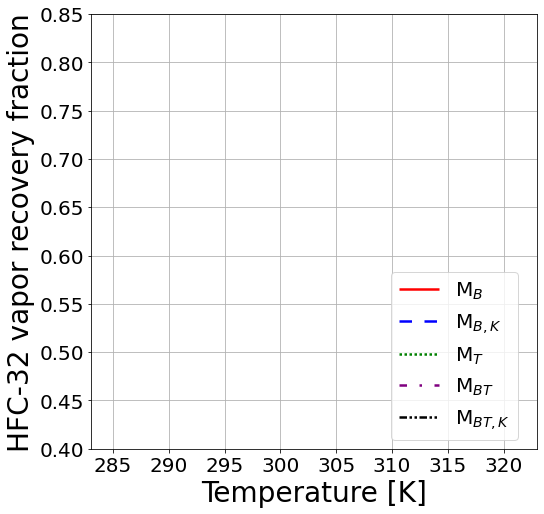

In [8]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1)

plt.plot(300,0.6, linewidth=2.5,linestyle=linestyle[0], color='red',label="M$_B$")  
plt.plot(300,0.6, linewidth=2.5,linestyle=linestyle[1], color='blue',label="M$_{B,K}$") 
plt.plot(300,0.6, linewidth=2.5,linestyle=linestyle[2], color='green',label="M$_T$") 
plt.plot(300,0.6, linewidth=2.5,linestyle=linestyle[3], color='purple',label="M$_{BT}$") 
plt.plot(300,0.6, linewidth=2.5,linestyle=linestyle[4], color='black',label="M$_{BT,K}$") 

# ax.set_title("recovery fraction",fontsize=20)
plt.xlabel('Temperature [K]',fontsize=28)
plt.ylabel('HFC-32 vapor recovery fraction',fontsize=28)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid(True)
plt.ylim(0.4,0.85)
plt.xlim(283,323)
plt.legend(fontsize=20,bbox_to_anchor=(0.65, 0.43), loc='upper left')
plt.savefig('flash2.png', bbox_inches='tight',dpi=300)
plt.grid(True)
plt.show()